In [123]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
# step -1 Generate data
X,y = make_regression(n_samples=500, n_features=10,n_informative=10,noise = 14, random_state=0)
print(X.shape,y.shape)
df = pd.DataFrame(X)
n_features = X.shape[1]
df.head()



(500, 10) (500,)


,0,1,2,3,4,5,6,7,8,9
0,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
1,0.967446,-1.226622,-0.817493,-1.401347,-0.263937,-0.055353,1.030438,0.352817,-0.152774,-2.047324
2,0.802456,-0.268003,1.867559,0.906045,-0.155010,0.947252,-0.861226,0.614079,0.922207,1.910065
3,-0.977278,1.867558,1.764052,0.400157,-0.151357,0.950088,0.978738,-0.103219,0.410599,2.240893
4,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093


In [1]:
# Step -2 -Normalise
def normalise(X):
    u = X.mean(axis =0) #column
    std =X.std(axis=0)
    return (X-u)/std

In [239]:
X= normalise(X)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
1,0.967446,-1.226622,-0.817493,-1.401347,-0.263937,-0.055353,1.030438,0.352817,-0.152774,-2.047324
2,0.802456,-0.268003,1.867559,0.906045,-0.155010,0.947252,-0.861226,0.614079,0.922207,1.910065
3,-0.977278,1.867558,1.764052,0.400157,-0.151357,0.950088,0.978738,-0.103219,0.410599,2.240893
4,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093


In [241]:
X.mean(axis= 0)
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

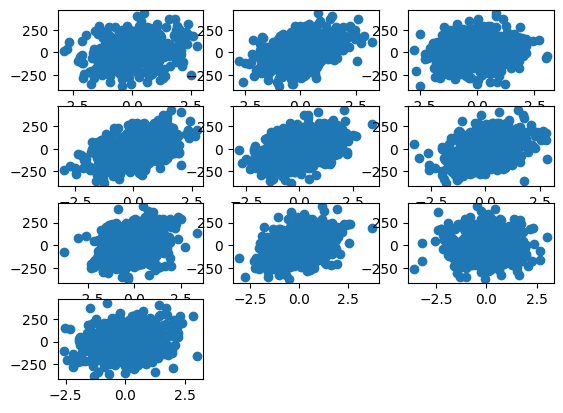

In [243]:
#Visualise y as function of each feature(9 features)
for i in range(0,10):
    plt.subplot(4,3,i+1)
    plt.scatter(X[:,i],y)
plt.show()




In [244]:
# Step 4 Train test 
XT,Xt,yT,yt = train_test_split(X,y,test_size = 0.3 ,shuffle = False , random_state = 0) # 30 pecent of total data is for testing data

In [245]:
print(XT.shape)

(350, 10)


In [246]:
def preprocess(X):
    # add a column of 1s in X as 0th column(X0)
    if X.shape[1] == n_features :
        m = X.shape[0]
        extra = np.ones((m,1))
        X=np.hstack((extra,X)) # hstack mean horizontal stack
    return X
    
    

In [247]:
# Step 5- modelling/liner regression with multiple features

def  hypothesis(X,theta):
    return np.dot(X,theta) #faster/vectorised, faster than loops

def loss(X,y,theta):
    yp = hypothesis(X,theta)
    error = np.mean((y-yp)**2)
    return error

def gradient(X,y, theta):
    yp = hypothesis(X,theta)
    grad = np.dot(X.T,(yp - y))
    m=X.shape[0]
    return grad/m
def train(X,y,learning_rate = 0.1):
    n = X.shape[1]
    theta = np.random.randn(n)
    error_list = []
    for i in range(100):
        error = loss(X,y,theta)
        error_list.append(error)
        grad = gradient(X,y,theta)
        theta = theta - grad * learning_rate
    plt.plot(error_list)
    return theta
    



    

[29.41425747 59.90114961 11.0945357  63.52051167 57.15064795 48.43698313
 41.27938638 55.22987625  2.10461527 25.98820128]


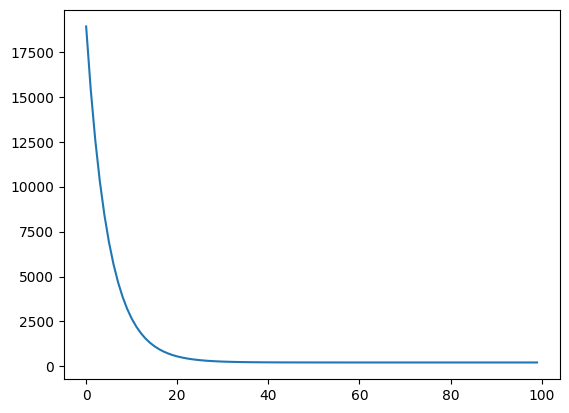

In [248]:
theta = train(XT,yT)
print(theta)

In [253]:
XT = preprocess(XT)
Xt = preprocess(Xt)
pd.DataFrame(XT).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
1,1.0,1.013719,-1.152930,-0.728991,-1.520305,-0.227862,-0.079490,1.047138,0.337413,-0.222377,-2.028019
2,1.0,0.846030,-0.196316,1.974867,0.899303,-0.120924,1.012577,-0.858283,0.593479,0.886169,1.988137
3,1.0,-0.962820,1.934780,1.870636,0.368813,-0.117338,1.015666,0.995061,-0.109551,0.358586,2.323878
4,1.0,-0.143907,0.593310,-1.207684,0.229233,0.839718,0.821459,-0.030363,2.111820,1.313428,-1.135732


In [274]:
r2Score(yt,yp)

0.9893992640212735

## Linear Regession with sklearn

In [279]:
from sklearn.linear_model import LinearRegression

In [281]:
model = LinearRegression()

In [285]:
model.fit(XT , yT) # Training the data

LinearRegression()

In [287]:
yp = model.predict(Xt)

In [289]:
yp.shape

(150,)

In [291]:
model.score(Xt,yt)

0.9904609095479635

In [3]:
model.coef_ # all theta values

NameError: name 'model' is not defined